#Face Verification using MTCNN and VGGFace2

Face Verification is a task of identifying a person by via an image of their face. This task can further be broken down into three subtasks : Face Detection, Feature Extraction, and Classification.


##Face Detection

MTCNN is used as the face detection model here.

In [ ]:
!pip install mtcnn keras_vggface keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install keras_applications --no-deps
filename = "/usr/local/lib/python3.8/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-r2eba0fg
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-r2eba0fg
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


20951

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = "/usr/local/lib/python3.7/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))

FileNotFoundError: ignored

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from scipy.spatial.distance import cosine
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
import sys

In [ ]:
# extract a single face from an uploaded photograph
detector = MTCNN()
def extract_face(filename,detector=detector,required_size=(224, 224)):
	pixels = plt.imread(filename)
	# create the detector, using default weights
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array
    # resize pixels to the model size


In [ ]:
filepath = "drive/MyDrive/missing child model/images/Virat/"

1/1 [==============================] - 0s 144ms/step


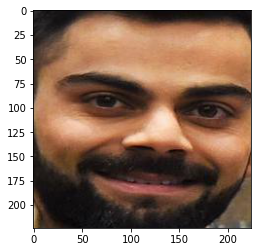

In [ ]:


#replace with filename here
idfile= filepath + 'Virat.jpg'
face = extract_face(idfile)
# plot the extracted face
plt.imshow(face)
# show the plot
plt.show()

In [ ]:
# create a vggface model
model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

94694792/94694792 [==============================] - 6s 0us/step


In [ ]:
#the resnet model represents the face in a 2048-dimension feature space.

def get_embedding(filename,model=model):
    # extract faces
    face = extract_face(filename)
    # convert into an array of samples
    sample = [asarray(face, 'float32')]
    # prepare the face for the model, e.g. center pixels
    sample = preprocess_input(sample, version=2)
    # perform prediction
    yhat = model.predict(sample)
    return yhat

In [ ]:
ID_embedding = get_embedding(idfile)
print("shape of embedding:",ID_embedding.shape)
print("embedding:",ID_embedding)

1/1 [==============================] - 1s 970ms/step
shape of embedding: (1, 2048)
embedding: [[0.33590168 2.7267966  0.10865239 ... 1.2550375  0.35118815 0.3547695 ]]


In [ ]:
subfile= filepath + 'Virat2.jpg'
subject_embedding = get_embedding(subfile)

1/1 [==============================] - 0s 191ms/step


In [ ]:
def is_match(file1, file2, ID_embedding, subject_embedding, show_faces,thresh=0.4):
    # calculate distance between embeddings
    score = cosine(ID_embedding, subject_embedding)
    if show_faces==True:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.imshow(extract_face(file1))
        ax1.set_title('ID face')
        ax2.imshow(extract_face(file2))
        ax2.set_title('Subject face')

    if score <= thresh:
        print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
    else:
        print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))

1/1 [==============================] - 0s 32ms/step
>face is a Match (0.203 <= 0.400)


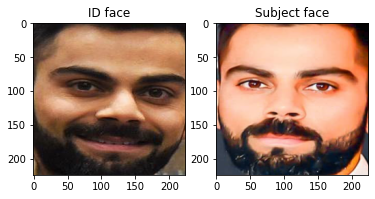

In [ ]:
is_match(idfile,subfile,ID_embedding, subject_embedding,show_faces=True)

1/1 [==============================] - 0s 37ms/step
>face is NOT a Match (0.690 > 0.400)


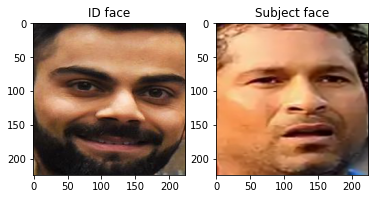

In [ ]:
subfile=filepath + 'Sachin.jpg'
subject_embedding = get_embedding(subfile)
is_match(idfile,subfile,ID_embedding, subject_embedding,show_faces=True)

1/1 [==============================] - 0s 35ms/step
>face is a Match (0.257 <= 0.400)


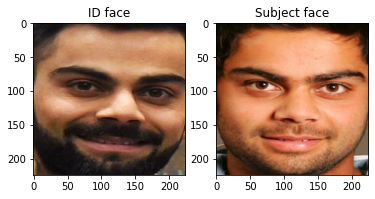

In [ ]:
subfile=filepath + 'Virat4.jpg'
subject_embedding = get_embedding(subfile)
is_match(idfile,subfile,ID_embedding, subject_embedding,show_faces=True)

1/1 [==============================] - 0s 29ms/step
>face is NOT a Match (0.489 > 0.400)


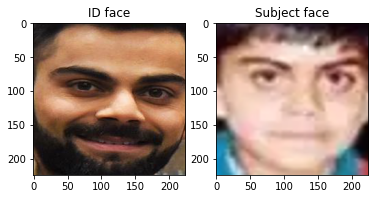

In [ ]:
subfile=filepath + 'Virat5.jpg'
subject_embedding = get_embedding(subfile)
is_match(idfile,subfile,ID_embedding, subject_embedding,show_faces=True)